# Week 8: Convolutional Neural Networks (CNN)

In this lab, we will cover convolutions and pooling in order to create CNNs. We also build a model to classify digit images using the MNIST dataset. Last, you will be asked to create a CNN model for a flower classification task.

## Basic Imports

For this lab session, we will be needing Keras, Numpy and Tensorflow. <br>
We will build our CNN in Keras, but first we need to understand the underlying principles, for which we will use Tensorflow. <br>
Numpy will be mainly used for dataset preprocessing.

In [ ]:
import keras
import numpy as np

from numpy.random import seed
import tensorflow as tf

## Replicability
While experimenting and researching, it is important that your results can be __replicated by other people__. <br>
To ensure some level of replicability, we can __set the starting seed__ of both numpy and tensorflow __to known value__. <br>
Therefore, when we initialise our network to random values, these states can be calculated and replicated just by knowing the seed.

In [ ]:
seed(101)
tf.random.set_seed(101)

## Low Level Code

While building a CNN model, we will add whole convolution layer in a neat package `Conv2D()`. <br>
But before we do so, it is good to understand the __underlaying mechanics__ and __code implementation__ of convolutions. <br>
In the following example, we will define our image/data array `inputs`, and using `kernel` to apply 2D convolution. <br>


A convolution input must have shape of `(BatchSize, width, height, inputChannels)` <br>
A convolution filter must have shape of `(width, height, inputChannels, outputChannels)` <br>

# Convolutions

Convolutional Neural Networks (CNNs) are designed to learn features directly from image pixels. They can classify patterns or objects with extreme variability. Currently, they form the core of various __computer vision systems__ such as Facebook's automated photo tagging, handwritten characters recognition, self-driving cars, marine mammal detection, and medical image analysis. In this lab, we will start by exploring a convolution function which forms the heart of CNNs.

![image.png](https://global.discourse-cdn.com/business5/uploads/pynq1/original/2X/9/984a55715f7e36bdf068ee82d23a204d398f8561.jpeg)

### Task
1) Experiment with different strides, kernel, padding etc. <br>
2) Why does first ouput element equal to 21.0?


The first element of the output is 21 as this is the result of applying the kernel to the top left (1st position) of the input.
This gives us the values 1 + 7 + 13 = 21

In [ ]:
# We need keras.backend and tensorflow to create proper tensors directly
import keras.backend as K
import tensorflow as tf


inputs = tf.constant([[1.0,  2.0, 3.0,  4.0, 5.0],
            [6.0,  7.0, 8.0,  9.0, 10.0],
            [11.0, 12.0, 13.0, 14.0, 15.0],
            [16.0, 17.0, 18.0, 19.0, 20.0],
            [21.0, 22.0, 23.0, 24.0, 25.0],
            ])


kernel = tf.constant([[1.0,0.0,0.0],
            [0.0,1.0,0.0],
            [0.0,0.0,1.0]
            ])


# -1 here in reshape is a placeholder, when we are not sure which value we want to use for the 1st dimension, keras infers it for us
inputs = K.reshape(inputs,(-1,5,5,1))
print("Shape of an Input:", inputs.shape)

kernel =K.reshape(kernel,(3,3,1,1))
print("Shape of a Kernel", kernel.shape)

strides=(1, 2)
padding='valid'

result = K.conv2d(inputs, kernel, strides=strides, padding=padding)
print("Shape of result:", result.shape)

print("Result:", K.eval(result))

Shape of an Input: (1, 5, 5, 1)
Shape of a Kernel (3, 3, 1, 1)
Shape of result: (1, 3, 2, 1)
Result: [[[[21.]
   [27.]]

  [[36.]
   [42.]]

  [[51.]
   [57.]]]]


# Pooling

## MaxPooling

Another important concept of CNNs is max-pooling, which is a form of
non-linear down-sampling. Max-pooling partitions the input image into a
set of non-overlapping rectangles and, for each such sub-region, outputs
the maximum value.
Max-pooling is useful in vision for two reasons:
- By eliminating non-maximal values, it reduces computation for upper layers.
- It provides a form of translation invariance.


## AveragePooling
Alternative to MaxPooling is Average pooling, where you take sum of all elements in pool and divide by number of elements. 

Experiment with different strides, kernel, padding etc. <br> 


In [ ]:
inputs = tf.constant([[1.0,  2.0, 3.0,  4.0, 5.0],
            [6.0,  7.0, 8.0,  9.0, 10.0],
            [11.0, 12.0, 13.0, 14.0, 15.0],
            [16.0, 17.0, 18.0, 19.0, 20.0],
            [21.0, 22.0, 23.0, 24.0, 25.0],
            ])

inputs = K.reshape(inputs,(-1,5,5,1))
print("Input shape:", inputs.shape)

pool_size = (2, 2)
strides=(1, 1)
padding='valid'
pool_mode='max' # or use 'avg'

result = K.pool2d(inputs, pool_size=pool_size, strides = strides,
                          padding = padding,
                          pool_mode = pool_mode)

print("Output shape:", result.shape)
print("Result:", K.eval(result))

Input shape: (1, 5, 5, 1)
Output shape: (1, 4, 4, 1)
Result: [[[[ 7.]
   [ 8.]
   [ 9.]
   [10.]]

  [[12.]
   [13.]
   [14.]
   [15.]]

  [[17.]
   [18.]
   [19.]
   [20.]]

  [[22.]
   [23.]
   [24.]
   [25.]]]]


# Stride and Padding
- You might have noticed the padding and stride, but do you know what the stride and padding exactly are?
- Check this page for some visualisations https://ezyang.github.io/convolution-visualizer/ 

## <font color='red'>Task 1</font>
We have a input of (1x4x4x1)
- Can you make a Conv2D that give the output that is the same size as the input?
- Can you make the output a half smaller than the original output? `(1x2x2x1)`
- You can verify by printing out the result.shape

In [ ]:
inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0]],
                      [[16.0], [17.0], [18.0], [19.0]],
                      [[21.0], [22.0], [23.0], [24.0]]
                     ])

inputs = K.reshape(inputs,(-1,4,4,1))
print("Shape of an Input:", inputs.shape)
# Your code here (make the same size)
# Make sure your output's shape is the same as the input 1x4x4x1
kernel = tf.constant([[1.0,0.0,0.0],
            [0.0,1.0,0.0],
            [0.0,0.0,1.0]
            ])
kernel =K.reshape(kernel,(3,3,1,1))

strides=(1,1)

#using padding ='same' ensures that the output will have the same spatial resolution (size) as the input
result = K.conv2d(inputs, kernel, strides=strides, padding='same')
print("The result is ",result.shape)





# Your code here (make a half smaller)
# Make sure your output's shape is half of the input 1x2x2x1
kernel = tf.constant([[1.0,0.0,1.0],
            [0.0,1.0,0.0],
            [0.0,0.0,1.0]
            ])
kernel =K.reshape(kernel,(2,2,1,1))
result = K.conv2d(result, kernel, strides = strides, padding = 'valid')
print(result.shape)






Shape of an Input: (1, 4, 4, 1)
The result is  (1, 4, 4, 1)
(1, 3, 3, 1)


# Using these techniques in a Keras Sequential model

Keras provides convolution and [pooling](https://keras.io/api/layers/pooling_layers/) layers, which can be used as-is, such as [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/).

Pay close attention to the input and output shapes, as well as the optional parameters which may come in handy.

We will walk through building a CNN classifier using the MNIST dataset.


## <font color='red'>Tasks</font>
- Please load the dataset using Keras (hint [check the API](https://keras.io/api/datasets/mnist/))

In [ ]:
from keras.datasets import mnist
# Your code here, replace None with mnist data
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


## Visualizing the dataset
We will use __matplot library__ to display an image from the MNIST dataset. <br>

Since we have __grayscale__ image, we need to specify that, while displaying it via `cmap='gray'`
## <font color='red'>Task</font>
- Please try to visualize more image data, so you can grasp what is in it

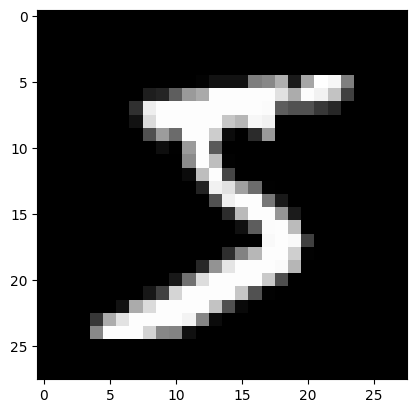

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(X_train_orig[0], cmap='gray')

In [ ]:
# Your code here, try to plot another image, maybe X_train_orig[1] or other image you like



In [ ]:
# Try to print the raw value from data, to see what is it like



# Try to print the size a image, so you might know how it looks numerically




# Shaping dataset

## Images
Currently, the X part of dataset is in form `(number_of_samples, px_width, px_height)` <br>
There is one implied information about the dataset, but we need to directly specify it. This information is regarding number of channels per image. Since the MNIST dataset is only greyscale, we need to specify it in the dimensionality of the dataset.
Therefore, we need to convert it from `(60000, 28, 28)` to `(60000,28,28,1)`, where `1` stands for greyscale. <br>
If we had an RGB image, the shape of the dataset would look like this `(60000,28,28,3)`

In [ ]:
X_train = X_train_orig.reshape(60000,28,28,1)
X_test = X_test_orig.reshape(10000,28,28,1)
#here we are reshaping the x data (training and test) so that it notes the fact that its greyscale (one color channel)
#if it were RGB then we would have 3 color channels


## Labels

Label for each image is in form of an __integer__ ranging from 0 to 9. <br>
We can use a __one hot encoding__ to transform them into a __binary matrix__. We know there are 10
classes for this problem, so we can expect the binary matrix to have a width
of 10.

### Converting labels to one-hot representation
y_train_orig[0] <b>before</b> conversion is <b>[5]</b> <br>
y_train_orig[0] <b>after</b> conversion is <b>[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]</b>

In [ ]:
print(y_train_orig[0])

5


In [ ]:
from keras.utils import to_categorical
to_categorical(y_train_orig[0], 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Converting all labels to one-hot matrix
We will use the same `to_categorical` function to convert the whole dataset into matrix of one-hot encodings.

1) What is the shape of newly created dataset? <br>
2) [Optional] Instead of pre-made `to_categorical` function, can you code your own with same functionality?

In [ ]:
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

# Building the model
In this section we will combine previously demonstrated mechanisms into one system. <br>

For this very simple model, we will be using `Conv2D`, `Flatten`, `MaxPool2D' and `Dense` layers. `Dense` = fully-connected.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

def create_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation="relu")) #convolutional layers first
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    
    return model

In [ ]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64)  # Notice the handy validation_split parameter, no need to create validation splits manually!



Epoch 1/3
750/750 [==============================] - 6s 6ms/step - loss: 0.1641 - accuracy: 0.9513 - val_loss: 0.0738 - val_accuracy: 0.9781
Epoch 2/3
750/750 [==============================] - 4s 6ms/step - loss: 0.0548 - accuracy: 0.9838 - val_loss: 0.0681 - val_accuracy: 0.9820
Epoch 3/3
177/750 [======>.......................] - ETA: 2s - loss: 0.0305 - accuracy: 0.9902

KeyboardInterrupt: ignored

## Data Normalization
Though we can observe that the neural network is learning, the rate is __very slow__ and __learning rate deteriorates very quickly__. <br>
This behaviour is due to extreme differences between `max` (255) and `min` (0) values of our dataset. <br>
Neural networks are performing __best when dataset ranges from 0 to 1__, or in some cases -1 to 1. <br>
Since we can imagine these values as signal strength, very high values, such as 255, are way too overpowering and strengthening non-optimal paths too quickly. <br>
Therefore we need to divide our training and testing dataset by 255 to get values ranging from 0 to 1. 


In [ ]:
X_train = X_train/255
X_test = X_test/255

## Training on Normalized dataset
We will generate a new model and train it on normalized dataset. <br>


In [ ]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=4, batch_size=64)

Epoch 1/4
750/750 [==============================] - 6s 6ms/step - loss: 0.1646 - accuracy: 0.9513 - val_loss: 0.0696 - val_accuracy: 0.9801
Epoch 2/4
750/750 [==============================] - 4s 5ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0614 - val_accuracy: 0.9833
Epoch 3/4
750/750 [==============================] - 5s 6ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0551 - val_accuracy: 0.9841
Epoch 4/4
750/750 [==============================] - 4s 5ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0540 - val_accuracy: 0.9848


And to evaluate, we can use `model.evaluate` which:

> Returns the loss value & metrics values for the model in test mode.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9854


[0.04780491068959236, 0.9854000210762024]

Now, try to create a new model by yourself with different layers (including a pooling layer) and train the model.

In [ ]:
def create_my_model():
    model = Sequential()
    # your model here
    #start with 2 convolutional layers
    model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation="relu")) #convolutional layers first
    #now we apply the pooling layer
    # for a pooling layer
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    #after we are done pooling, we flatten the data
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    return model




my_model = create_my_model()
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
my_model.fit(X_train, y_train, validation_split=0.2, epochs=4, batch_size=32) 




my_model.evaluate(X_test, y_test)


Epoch 1/4
1500/1500 [==============================] - 11s 5ms/step - loss: 0.1602 - accuracy: 0.9512 - val_loss: 0.0684 - val_accuracy: 0.9799
Epoch 2/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0557 - accuracy: 0.9834 - val_loss: 0.0661 - val_accuracy: 0.9812
Epoch 3/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0594 - val_accuracy: 0.9818
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9887


[0.0389774926006794, 0.9886999726295471]

### Tensorflow Playground

To better visualise the importance of feature maps and feature extraction you can visit the following website and experiment with the structure of the network, hyperparameters to get instant visual feedback and see how your changes reflect the detection of features:

[Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.77793&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


# Challenge Part: Flowers
The "102 Category Flower Dataset" is a flower data set captured by Oxford https://www.robots.ox.ac.uk/~vgg/data/flowers/102/. The authors of the dataset help to visualise the classes via:

Shape Isomap

![image](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/T_shapeiso.jpg)

Colour Isomap

![image](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/T_colouriso.jpg)

From this, we can see that colour data could be very helpful to our model.

In this lab, we will only use the images of 2 flowers (artichoke and buttercup) for training and testing a CNN model.

Now download the dataset from SurreyLearn (https://surreylearn.surrey.ac.uk/d2l/le/lessons/239765/lessons/2699259) and upload the Lab8.zip file to the Google Colab file folder (the file folder icon in the left sidebar).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:


!unzip "drive/MyDrive/Lab8.zip" -d "drive/MyDrive"
#!unzip path_to_file.zip -d path_to_directory

unzip:  cannot find or open drive/MyDrive/Lab8.zip, drive/MyDrive/Lab8.zip.zip or drive/MyDrive/Lab8.zip.ZIP.


We can use the [`image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) utility function to load the images. This is handy because it won't load all the images at once (which can cause you to run out of memory: if using Colab, see the RAM indicator in the toolbar).

Now to load the dataset:

In [ ]:
from keras.utils import image_dataset_from_directory

# Up to you: RGB is default, but perhaps colours aren't that helpful...?
colour_mode = 'rgb'

# Up to you: change the image size if desired. Perhaps they don't need to be that big.
image_size = (100, 100)

# Up to you: training batch size.
batch_size = 12

train_flowers_dataset = image_dataset_from_directory(
  'drive/MyDrive/ABFlowerTrain',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='training',
  seed=42,
  label_mode='binary',  # There are two classes for this task.
  image_size=image_size,
  batch_size=batch_size)

validation_flowers_dataset = image_dataset_from_directory(
  'drive/MyDrive/ABFlowerTrain',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='validation',
  seed=42,
  label_mode='binary',  # There are two classes for this task.
  image_size=image_size,
  batch_size=batch_size)

test_flowers_dataset = image_dataset_from_directory(
  'drive/MyDrive/ABFlowerTest',
  shuffle=False,  # Important: the test dataset order must match Kaggle!
  labels=None,  # Important: the test dataset has no labels...
  color_mode=colour_mode,
  image_size=image_size,
  batch_size=1)  # Don't batch the test samples.

print('Train label names:', train_flowers_dataset.class_names)
print('Test label names (empty):', test_flowers_dataset.class_names)

Found 96 files belonging to 2 classes.
Using 77 files for training.
Found 96 files belonging to 2 classes.
Using 19 files for validation.
Found 23 files belonging to 1 classes.
Train label names: ['A', 'B']
Test label names (empty): ['']


In [ ]:
#batch size is 12 so .take(1) returns first 12 images
for images, labels in train_flowers_dataset.take(1):
  #take the first image

  image = images[0]
  label = labels[0]
  #print the first row (by height) of pixels
  #this has shape(100,3)

  #this will print the first pixel (top left) of the image
  #this will be a 1D array with 3 values, one for each of the 3 color channels
  
  print(image[0][0])
  print(image.shape)
  break


tf.Tensor([21.625 29.5   11.125], shape=(3,), dtype=float32)
(100, 100, 3)


In [ ]:
#get the labels for the dataset
for images, labels in train_flowers_dataset.take(7):
  print(image.shape)
  break

(1, 100, 100, 3)


Let's take a look:

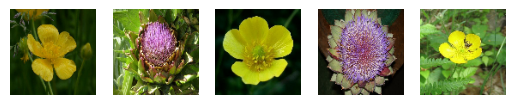

In [ ]:
for images, labels in train_flowers_dataset.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

Since this is a binary classification task, you can use one-hot or boolean/integer encoding for the targets. 

The dataset currently uses 0 and 1 for the targets: making the classifier an 'Is artichoke?' (or 'Is buttercup?', depending on ordering) classifier.

You can change this to one-hot encoding if you want using a `label_mode` of `categorical`.

Now create a Keras sequential model using the techniques covered in today's lab:

In [ ]:
# To normalise the dataset without first loading the images into memory, we can use a Rescaling layer.
# This means images are normalised when given as input to the model.
from keras.layers import Rescaling
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten


# Your code here: create the model
model = Sequential()
model.add(Rescaling(1./255))
  # Your layers here.
    # your model here
    #start with 2 convolutional layers
model.add(Conv2D(64, kernel_size=8, activation="relu", input_shape=(100,100,3)))
model.add(Conv2D(32, kernel_size=3, activation="relu")) #convolutional layers first
    #now we apply the pooling layer
    # for a pooling layer
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    #after we are done pooling, we flatten the data
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

  


# Your code here: compile the model with suitable losses and metrics.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Now train the model...
model.fit(train_flowers_dataset, batch_size=12, validation_data=validation_flowers_dataset, epochs=4)

Epoch 1/4
7/7 [==============================] - 4s 68ms/step - loss: 0.7496 - accuracy: 0.6623 - val_loss: 0.0950 - val_accuracy: 1.0000
Epoch 2/4
7/7 [==============================] - 0s 24ms/step - loss: 0.0877 - accuracy: 0.9610 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3/4
7/7 [==============================] - 0s 24ms/step - loss: 0.0624 - accuracy: 0.9740 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 4/4
7/7 [==============================] - 0s 23ms/step - loss: 0.0812 - accuracy: 0.9740 - val_loss: 0.0070 - val_accuracy: 1.0000


Now for the predictions:


In [ ]:
predictions = model.predict(test_flowers_dataset)


23/23 [==============================] - 0s 3ms/step
23



You may need to threshold or convert from one-hot encoding to get the correct labels, which should be 'A' for artichoke or 'B' for buttercup (not 0 or 1!). See week 6's lab for an example of this.

Set `final_predictions` to the final labelled outputs for the test samples, consisting of only 'A's or 'B's.

Plot all your test samples and the predictions.

In [ ]:
#iterate over the test dataset values
#test samples aren't batched
print(len(test_flowers_dataset))


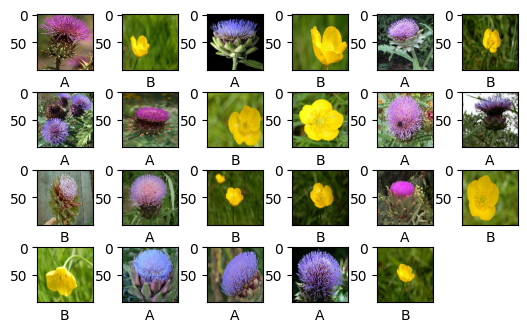

In [ ]:
# Example for an integer output:
from matplotlib import pyplot as plt
#A = ARTICHOKE, B FOR BUTTERCUP
# >0.5 
final_predictions = ['B' if prediction > 0.5 else 'A' for prediction in predictions]

# Example for one-hot:
#final_predictions = ['B' if prediction == 1 else 'A' for prediction in np.argmax(predictions, axis=1)]

# Visualise the predicted results by ploting all the test images and their predicted labels
for i, v in enumerate(test_flowers_dataset):
    plt.subplot(4, 6, i+1)
    plt.subplots_adjust(hspace=0.4, bottom=0.2, top=0.8)
    plt.imshow(v[0].numpy().astype('uint8'))
    plt.xticks([])  # Remove x-axis ticks
    plt.xlabel(final_predictions[i])  # Set x-axis label to predicted label
  


Now you've completed the task, think about the following.

For this task, did we really need a CNN? Could we have just averaged the image's colours to identify the flower?

If so, when might something like averaging colours not work?



### End of the notebook
